In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
def simulate_ride_distances():
    ride_dists = np.concatenate(
        (
            10*np.random.random(size=370),
            30*np.random.random(size=10),
            10*np.random.random(size=10),
            10*np.random.random(size=10)
        )
    )
    return ride_dists

In [3]:
def simulate_ride_speeds():
    ride_speeds = np.concatenate(
        (
            np.random.normal(loc=30, scale=5, size=370),
            np.random.normal(loc=30, scale=5, size=10),
            np.random.normal(loc=50, scale=10, size=10),
            np.random.normal(loc=15, scale=4, size=10)
        )
    )
    return ride_speeds

In [4]:
def simulate_ride_data():
    ride_dists = simulate_ride_distances()
    ride_speeds = simulate_ride_speeds()
    ride_times = ride_dists/ride_speeds
    
    # Assemble into Data Frame
    df = pd.DataFrame(
        {
            'ride_dist': ride_dists,
            'ride_time': ride_times,
            'ride_speed': ride_speeds
        }
    )
    ride_ids = datetime.datetime.now().strftime("%Y%m%d")+df.index.astype(str)
    df['ride_id'] = ride_ids
    return df

In [5]:
df = simulate_ride_data()

In [6]:
df.head()

,ride_dist,ride_time,ride_speed,ride_id
0,2.260819,0.087410,25.864478,202202120
1,7.293871,0.258686,28.195874,202202121
2,0.032260,0.000982,32.843216,202202122
3,1.081694,0.030223,35.790998,202202123
4,7.071081,0.245543,28.797753,202202124


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics


def cluster_and_label(data, create_and_show_plot=True):
    data = StandardScaler().fit_transform(data)
    db = DBSCAN(eps=0.3, min_samples=10).fit(data)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    run_metadata = {
        'nClusters': n_clusters_,
        'nNoise': n_noise_,
        'silhouetteCoefficient': metrics.silhouette_score(data, labels),
        'labels': labels,
    }
    if create_and_show_plot == True:
        fig = plt.figure(figsize=(10,10))
        unique_labels = set(labels)
        colors = [plt.cm.cool(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0,0,0,1]
            class_member_mask = (labels==k)
            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy.iloc[:,0], xy.iloc[:,1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)
            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy.iloc[:,0], xy.iloc[:,1], '^', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)
            
        plt.xlabel('Standard Scaled Ride Dist.')
        plt.ylabel('Standard Scaled Ride Time')
        plt.title('Estimated number of clusters: %d' % n_clusters_)
        plt.show()
    else:
        pass
    return run_metadata

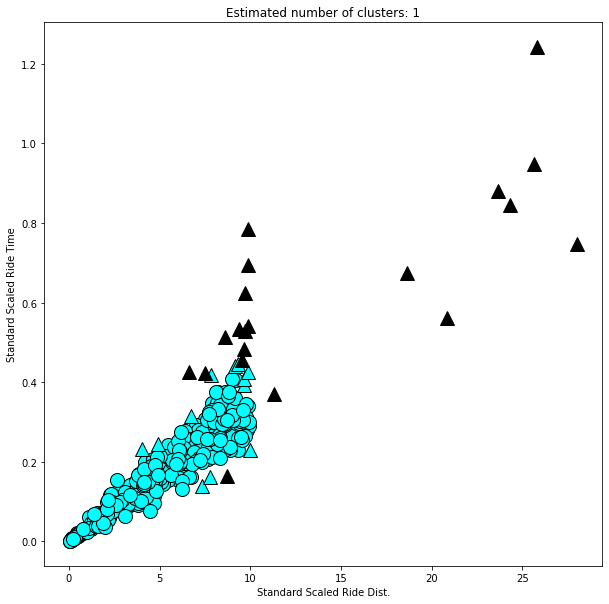

In [8]:
X = df[['ride_dist', 'ride_time']]
results = cluster_and_label(X)
df['label'] = results['labels']

<AxesSubplot:>

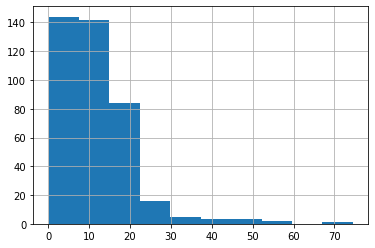

In [9]:
(df['ride_time']*60).hist()

<AxesSubplot:>

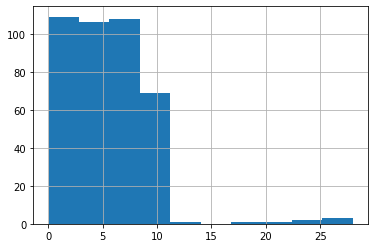

In [10]:
df['ride_dist'].hist()

<AxesSubplot:>

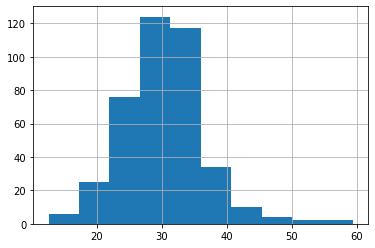

In [11]:
df['ride_speed'].hist()

<AxesSubplot:xlabel='ride_dist', ylabel='ride_time'>

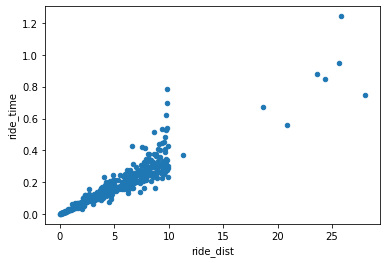

In [12]:
df.plot(x='ride_dist', y='ride_time', kind='scatter')

In [19]:
df.to_json('./output/labels.json', orient='records')

In [20]:
df[df['label']==-1].to_json(orient='records')

'[{"ride_dist":9.8631210611,"ride_time":0.6950716,"ride_speed":14.1900792097,"ride_id":"20220212102","label":-1},{"ride_dist":9.8434901604,"ride_time":0.541738141,"ride_speed":18.170199615,"ride_id":"20220212249","label":-1},{"ride_dist":9.699789327,"ride_time":0.6232849363,"ride_speed":15.5623676462,"ride_id":"20220212357","label":-1},{"ride_dist":9.5406980817,"ride_time":0.4560903182,"ride_speed":20.9184402777,"ride_id":"20220212360","label":-1},{"ride_dist":18.622378151,"ride_time":0.6740788246,"ride_speed":27.6264102525,"ride_id":"20220212370","label":-1},{"ride_dist":25.7921091349,"ride_time":1.2418805171,"ride_speed":20.7685914875,"ride_id":"20220212371","label":-1},{"ride_dist":11.2905738415,"ride_time":0.3707513212,"ride_speed":30.4532261854,"ride_id":"20220212373","label":-1},{"ride_dist":25.6372093294,"ride_time":0.9482888001,"ride_speed":27.0352337034,"ride_id":"20220212374","label":-1},{"ride_dist":24.3263388186,"ride_time":0.8461043489,"ride_speed":28.7509913542,"ride_id":